In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

580

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | pampa
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | ketchikan
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | san jose
Processing Record 19 of Set 1 | tromso
Processing Record 20 of Set 1 | otavalo
Processing Record 21 of Set 1 | mobaye
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | jamestown
Process

Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | marquette
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | mukhen
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | shelburne
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | birjand
Processing Record 47 of Set 4 | daru
Processing Record 48 of Set 4 | sokolka
Processing Record 49 of Set 4 | atuona
Processing Record 50 of Set 4 | turangi
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | chicama
Processing Record 7 of Set 5 | belyy yar
Processing Record 8 of Set 5 | jizan
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | ambon
Processing Record 11 of Set 5 

Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | port-cartier
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | namatanai
Processing Record 37 of Set 8 | korogwe
City not found. Skipping...
Processing Record 38 of Set 8 | hohhot
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | amuntai
Processing Record 43 of Set 8 | gusau
Processing Record 44 of Set 8 | balikpapan
Processing Record 45 of Set 8 | corpus christi
Processing Record 46 of Set 8 | camacha
Processing Record 47 of Set 8 | cocobeach
Processing Record 48 of Set 8 | lavrentiya
Processing Record 49 of Set 8 | nzerekore
Processing Record 50 of Set 8 | naze
Processing Record 1 of Set 9 | college
Processing Record 2 of Set 9 | pastavy
Processing Record 3 of Set 9 | acari
Processing Record 4 of Set 9 | z

Processing Record 18 of Set 12 | taltal
Processing Record 19 of Set 12 | ust-barguzin
Processing Record 20 of Set 12 | chakulia
Processing Record 21 of Set 12 | grafton
Processing Record 22 of Set 12 | katunino
Processing Record 23 of Set 12 | ostrozac
Processing Record 24 of Set 12 | dengzhou
Processing Record 25 of Set 12 | ypsonas
Processing Record 26 of Set 12 | henties bay
Processing Record 27 of Set 12 | mega
Processing Record 28 of Set 12 | hoquiam
Processing Record 29 of Set 12 | okakarara
Processing Record 30 of Set 12 | hangu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
print(len(city_data))

536


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,21.15,75,18,6.24,US,2022-01-26 03:31:18
1,Hasaki,35.7333,140.8333,45.28,84,100,18.14,JP,2022-01-26 03:31:19
2,Pampa,35.5362,-100.9599,26.74,54,100,17.27,US,2022-01-26 03:31:19
3,Busselton,-33.6500,115.3333,77.86,40,11,5.64,AU,2022-01-26 03:31:20
4,New Norfolk,-42.7826,147.0587,68.67,46,100,5.50,AU,2022-01-26 03:31:20
5,Ketchikan,55.3422,-131.6461,40.98,93,40,4.61,US,2022-01-26 03:31:21
6,Brae,60.3964,-1.3530,42.71,75,70,33.60,GB,2022-01-26 03:31:21
7,Shingu,33.7333,135.9833,56.39,50,53,12.82,JP,2022-01-26 03:31:22
8,Tuatapere,-46.1333,167.6833,57.81,79,81,14.56,NZ,2022-01-26 03:31:23
9,Ushuaia,-54.8000,-68.3000,42.46,75,75,25.32,AR,2022-01-26 03:31:23


In [17]:
# Rearrangle columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-26 03:31:18,42.6001,-73.9662,21.15,75,18,6.24
1,Hasaki,JP,2022-01-26 03:31:19,35.7333,140.8333,45.28,84,100,18.14
2,Pampa,US,2022-01-26 03:31:19,35.5362,-100.9599,26.74,54,100,17.27
3,Busselton,AU,2022-01-26 03:31:20,-33.6500,115.3333,77.86,40,11,5.64
4,New Norfolk,AU,2022-01-26 03:31:20,-42.7826,147.0587,68.67,46,100,5.50
...,...,...,...,...,...,...,...,...,...
531,Henties Bay,NA,2022-01-26 03:46:33,-22.1160,14.2845,66.85,91,30,10.89
532,Mega,ET,2022-01-26 03:46:33,4.0500,38.3000,59.36,37,1,17.67
533,Hoquiam,US,2022-01-26 03:46:34,46.9809,-123.8893,43.93,85,0,10.36
534,Okakarara,NA,2022-01-26 03:46:35,-20.5833,17.4333,68.47,53,91,4.74


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

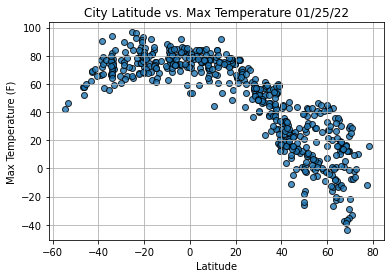

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

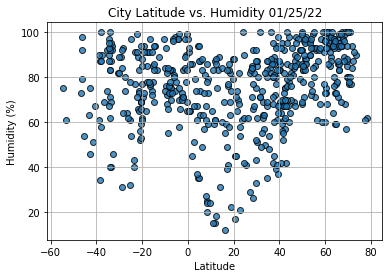

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

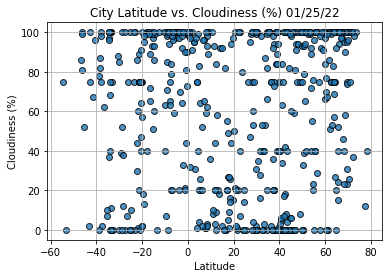

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

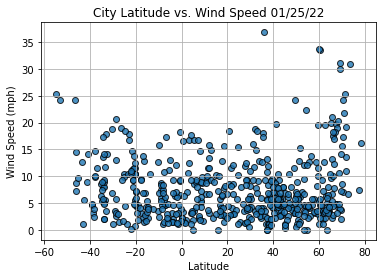

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()